# Distribution of MSEs

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df_total = pd.read_csv('df_total.csv')

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


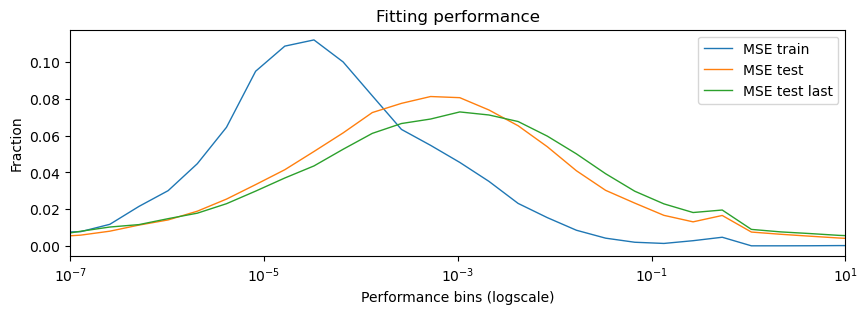

In [106]:
def plot_metric(series,my_metric,ls='-',lw=1):
    curbin = 0.0000000005
    binlist = [0]
    while curbin < 1000000:
        binlist.append(curbin)
        curbin *= 2
    [hist,edges] = np.histogram(series,bins=binlist)
    plt.plot(edges[:-1],hist/np.sum(hist),ls,label=my_metric,linewidth=lw)
    plt.xscale('log')

plt.figure(dpi=100,figsize=(10,3))    

plot_metric(df_total['MSE_trn'],'MSE train')
plot_metric(df_total['MSE_tst'],'MSE test')
plot_metric(df_total['MSE_tst_last'],'MSE test last')

plt.xlabel('Performance bins (logscale)')
plt.ylabel('Fraction')
plt.legend()
plt.title('Fitting performance')
plt.xlim([1e-7,1e1])

plt.savefig('fitting_dist_new.png', bbox_inches='tight')
plt.savefig('fitting_dist_new.eps', bbox_inches='tight')

#plt.show()

In [5]:
def empirical_cdf(ax,series,my_metric,ls='-',label='',linewidth=1):
    a = series.values
    ax.plot(np.sort(a), np.linspace(0, 1, len(a), endpoint=False), ls,label=label,linewidth=linewidth)


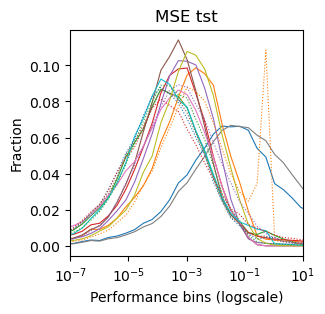

In [6]:
plt.figure(dpi=100,figsize=(3,3))    
ax = plt.subplot(111)

i = 0
for [curve_model, df_curve_model] in df_total.groupby('curve_model'):
    ls = '-'
    if i > 9:
        ls = ':'
    plot_metric(df_curve_model['MSE_tst'],curve_model,ls=ls,lw=0.8)
    #empirical_cdf(df_curve_model['MSE_tst'],curve_model,ls=ls,label=curve_model)
    i += 1

#box = ax.get_position()
#ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
    
plt.xlabel('Performance bins (logscale)')
plt.ylabel('Fraction')
#plt.legend()
plt.title('MSE tst')

plt.xscale('log')
plt.xlim([1e-7,1e1])

#ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.savefig('distribution_per_learner.png')
plt.savefig('distribution_per_learner.eps')
plt.show()

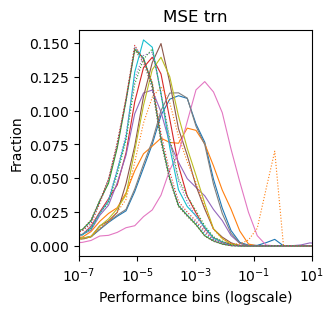

In [7]:
plt.figure(dpi=100,figsize=(3,3))    
ax = plt.subplot(111)

i = 0
for [curve_model, df_curve_model] in df_total.groupby('curve_model'):
    ls = '-'
    if i > 9:
        ls = ':'
    plot_metric(df_curve_model['MSE_trn'],curve_model,ls=ls,lw=0.8)
    #empirical_cdf(df_curve_model['MSE_tst'],curve_model,ls=ls,label=curve_model)
    i += 1

#box = ax.get_position()
#ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
    
plt.xlabel('Performance bins (logscale)')
plt.ylabel('Fraction')
#plt.legend()
plt.title('MSE trn')

plt.xscale('log')
plt.xlim([1e-7,1e1])

#ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.savefig('distribution_per_learner_trn.png')
plt.savefig('distribution_per_learner_trn.eps')
plt.show()

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


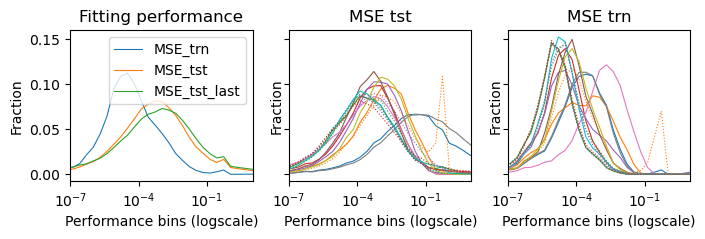

In [8]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, dpi=100, sharey=True, figsize=(8,2))

plt.sca(ax1) 

lw = 0.8

plot_metric(df_total['MSE_trn'],'MSE_trn',lw=lw)
plot_metric(df_total['MSE_tst'],'MSE_tst',lw=lw)
plot_metric(df_total['MSE_tst_last'],'MSE_tst_last',lw=lw)

plt.xlabel('Performance bins (logscale)')
plt.ylabel('Fraction')
plt.legend()
plt.title('Fitting performance')
plt.xlim([1e-7,1e1])

i = 0
for [curve_model, df_curve_model] in df_total.groupby('curve_model'):
    ls = '-'
    plt.sca(ax2) 
    if i > 9:
        ls = ':'
    plot_metric(df_curve_model['MSE_tst'],curve_model,ls=ls,lw=0.8)
    #empirical_cdf(df_curve_model['MSE_tst'],curve_model,ls=ls,label=curve_model)
    i += 1

#box = ax.get_position()
#ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
    
plt.xlabel('Performance bins (logscale)')
plt.ylabel('Fraction')
#plt.legend()
plt.title('MSE tst')

plt.xscale('log')
plt.xlim([1e-7,1e1])

#ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

i = 0
for [curve_model, df_curve_model] in df_total.groupby('curve_model'):
    plt.sca(ax3) 
    ls = '-'
    if i > 9:
        ls = ':'
    plot_metric(df_curve_model['MSE_trn'],curve_model,ls=ls,lw=0.8)
    #empirical_cdf(df_curve_model['MSE_tst'],curve_model,ls=ls,label=curve_model)
    i += 1

#box = ax.get_position()
#ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
    
plt.xlabel('Performance bins (logscale)')
plt.ylabel('Fraction')
#plt.legend()
plt.title('MSE trn')

plt.xscale('log')
plt.xlim([1e-7,1e1])

#ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.savefig('alltogether.png',bbox_inches='tight')
plt.savefig('alltogether.eps',bbox_inches='tight')
plt.show()

/home/felix/anaconda3/lib/python3.7/site-packages/numpy/ma/core.py:6849: RuntimeWarning: overflow encountered in power
  result = np.where(m, fa, umath.power(fa, fb)).view(basetype)
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


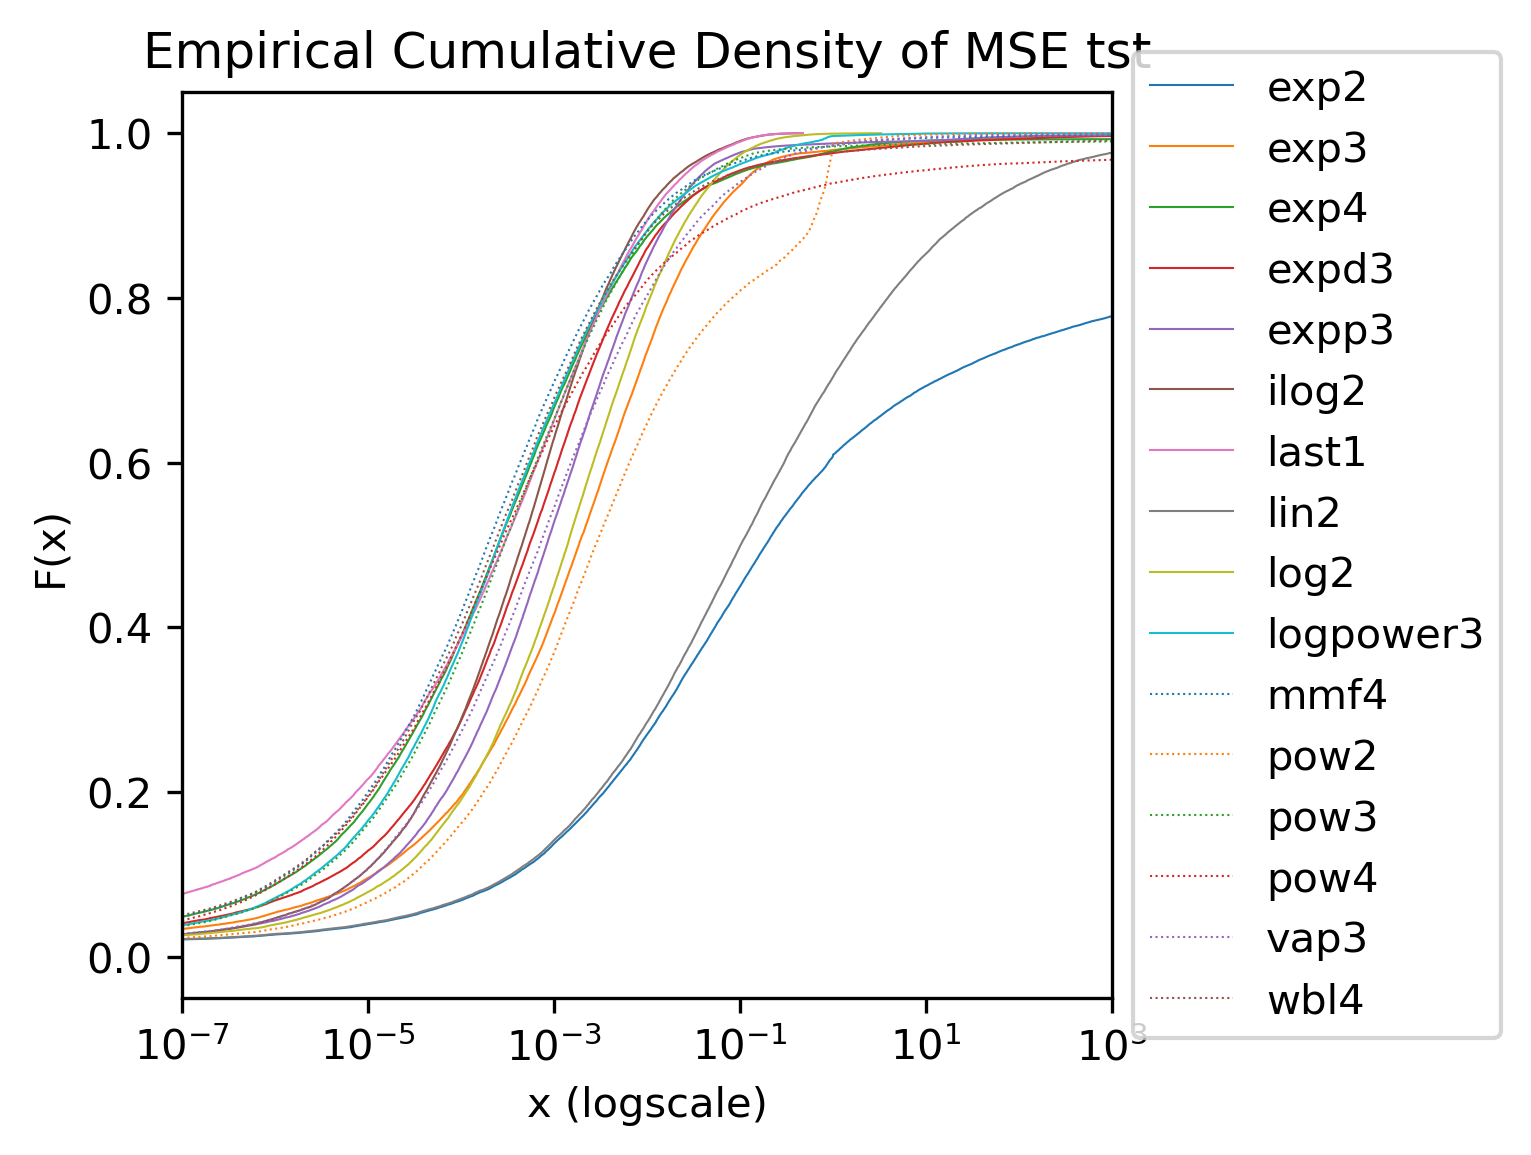

In [9]:
plt.figure(figsize=(5,4),dpi=300)
ax = plt.subplot(111)

i = 0
for [curve_model, df_curve_model] in df_total.groupby('curve_model'):
    ls = '-'
    if i > 9:
        ls = ':'
    #plot_metric(df_curve_model['MSE_tst'],curve_model,ls=ls)
    empirical_cdf(ax,df_curve_model['MSE_tst'],curve_model,ls=ls,label=curve_model, linewidth=0.5)
    i += 1

box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
    
plt.xlabel('x (logscale)')
plt.ylabel('F(x)')
plt.legend()
plt.title('Empirical Cumulative Density of MSE tst')

plt.xscale('log')
plt.xlim([1e-7,1e3])

ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.savefig('cdf_per_learner_MSE_tst.png')
plt.savefig('cdf_per_learner_MSE_tst.eps')

plt.show()

In [10]:
df_curve_model

,openmlid,learner,max_anchor_seen,prediction,beta,fails_init,fails_fit,MSE_trn,MSE_tst,MSE_tst_last,L1_trn,L1_tst,L1_tst_last,max anchor seen,percentage,n,curve_model
140,24,SVC_linear,45,[0.88829181 0.91274518 0.93264536 0.95101879 0...,[ 4.06283067 28.13942643 1.0717593 0.07722542],0,0,7.999691e-08,0.001711,0.003897,7.999691e-08,0.001711,0.003897,45,0.01,4,wbl4
141,24,SVC_linear,64,[0.8883767 0.91235922 0.93337048 0.95033341 0...,[0.02765803 0.15529913 0.96437546 1.1728596 ],0,0,5.200069e-07,0.000893,0.001269,5.200069e-07,0.000893,0.001269,64,0.01,5,wbl4
142,24,SVC_linear,91,[0.88816895 0.91294286 0.93308388 0.94967032 0...,[0.11694968 0.23953041 0.97109785 0.79526311],0,0,7.883319e-07,0.000607,0.000835,7.883319e-07,0.000607,0.000835,91,0.01,6,wbl4
143,24,SVC_linear,128,[0.88782287 0.91392924 0.93296775 0.94849451 0...,[2.03850624 4.05891656 0.98900732 0.2141958 ],0,0,1.941635e-06,0.000089,0.000121,1.941635e-06,0.000089,0.000121,128,0.02,7,wbl4
144,24,SVC_linear,181,[0.88779791 0.91409347 0.9329409 0.94827691 0...,[7.21246343e+00 9.45614014e+02 9.96932836e-01 ...,0,0,1.802634e-06,0.000017,0.000011,1.802634e-06,0.000017,0.000011,181,0.03,8,wbl4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
758759,40668,sklearn.tree.ExtraTreeClassifier,8192,[0.5295924 0.5343002 0.53882408 0.54374717 0...,[0.00840408 6.12667573 6.5766799 0.1594275 ],0,0,3.044095e-05,0.000155,0.000530,3.044095e-05,0.000155,0.000530,8192,0.14,19,wbl4
758760,40668,sklearn.tree.ExtraTreeClassifier,11585,[0.52945732 0.53421315 0.53877771 0.54373925 0...,[0.01129618 4.74613207 5.19353257 0.15664965],0,0,2.897801e-05,0.000160,0.000450,2.897801e-05,0.000160,0.000450,11585,0.20,20,wbl4
758761,40668,sklearn.tree.ExtraTreeClassifier,16384,[0.52975158 0.53434377 0.53878816 0.54365508 0...,[0.07273651 0.52328195 0.98972983 0.20649045],0,0,2.770906e-05,0.000092,0.000202,2.770906e-05,0.000092,0.000202,16384,0.28,21,wbl4
758762,40668,sklearn.tree.ExtraTreeClassifier,23170,[0.53030014 0.53461807 0.53885174 0.54354314 0...,[0.07838437 0.31654985 0.79948269 0.26204136],0,0,2.690956e-05,0.000013,0.000023,2.690956e-05,0.000013,0.000023,23170,0.40,22,wbl4


In [98]:
def get_relevant_max_anchor(max_available_anchor):
    if max_available_anchor < 128:
        return max_available_anchor / 2
    sizes = np.array([2 ** int(np.ceil(k / 2)) for k in range(7, 100)])
    highest_anchor = sizes[max(np.where(sizes <= 0.2 * max_available_anchor)[0])]
    return highest_anchor

max_possible_anchors = {
    d: max(df_total[df_total["openmlid"] == d]["max_anchor_seen"]) for d in pd.unique(df_total["openmlid"])
}

get_relevant_max_anchor(6000)

df_for_cdf_plot = df_total.copy()
df_for_cdf_plot["relevant_max_anchor"] = [get_relevant_max_anchor(max_possible_anchors[openmlid]) for openmlid in df_total["openmlid"]]
df_for_cdf_plot

,openmlid,learner,max_anchor_seen,prediction,beta,fails_init,fails_fit,MSE_trn,MSE_tst,MSE_tst_last,L1_trn,L1_tst,L1_tst_last,max anchor seen,percentage,n,curve_model,relevant_max_anchor
0,24,SVC_linear,45,[0.88822531 0.91291234 0.93250134 0.95105036 0...,[ 3.44182996 2.66340821 0.01829253 -6.01064433],0,0,2.883226e-08,0.009280,0.030293,2.883226e-08,0.009280,0.030293,45,0.01,4,pow4,512.0
1,24,SVC_linear,64,[0.88801073 0.91329119 0.93325367 0.94936525 0...,[9.74933839e-01 1.94348774e+04 3.02994117e+00 ...,0,0,9.987909e-07,0.000413,0.000628,9.987909e-07,0.000413,0.000628,64,0.01,5,pow4,512.0
2,24,SVC_linear,91,[0.88804029 0.91322495 0.93322125 0.94941292 0...,[9.74827314e-01 4.14046965e+04 3.17546801e+00 ...,0,0,8.207896e-07,0.000451,0.000634,8.207896e-07,0.000451,0.000634,91,0.01,6,pow4,512.0
3,24,SVC_linear,128,[0.88792048 0.91372502 0.93293918 0.94861417 0...,[0.99101125 3.40284426 1.10691771 7.54712136],0,0,1.857116e-06,0.000071,0.000084,1.857116e-06,0.000071,0.000084,128,0.02,7,pow4,512.0
4,24,SVC_linear,181,[0.88785194 0.91397756 0.93290636 0.94832551 0...,[0.99827296 1.28641234 0.84143901 2.50408573],0,0,1.766385e-06,0.000015,0.000006,1.766385e-06,0.000015,0.000006,181,0.03,8,pow4,512.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
758859,40668,sklearn.tree.ExtraTreeClassifier,8192,[0.52225893 0.52917521 0.53554816 0.54220744 0...,[ 1.11874663e+02 1.49994232e+02 -3.64232570e-02],0,0,4.650329e-05,0.000149,0.000167,4.650329e-05,0.000149,0.000167,8192,0.14,19,logpower3,4096.0
758860,40668,sklearn.tree.ExtraTreeClassifier,11585,[0.52137696 0.5284236 0.53491839 0.54170671 0...,[ 1.27367604e+02 1.50682400e+02 -3.71459978e-02],0,0,4.831424e-05,0.000099,0.000096,4.831424e-05,0.000099,0.000096,11585,0.20,20,logpower3,4096.0
758861,40668,sklearn.tree.ExtraTreeClassifier,16384,[0.52054282 0.52770467 0.53430718 0.54120964 0...,[ 1.39854125e+02 1.50668938e+02 -3.77950780e-02],0,0,4.986637e-05,0.000056,0.000051,4.986637e-05,0.000056,0.000051,16384,0.28,21,logpower3,4096.0
758862,40668,sklearn.tree.ExtraTreeClassifier,23170,[0.52000523 0.52723677 0.53390444 0.54087596 0...,[ 1.37236937e+02 1.48624059e+02 -3.82020764e-02],0,0,4.926202e-05,0.000041,0.000030,4.926202e-05,0.000041,0.000030,23170,0.40,22,logpower3,4096.0


In [100]:
df_for_cdf_plot_filtered = df_for_cdf_plot[df_for_cdf_plot["max_anchor_seen"] == df_for_cdf_plot["relevant_max_anchor"]]

/home/felix/anaconda3/lib/python3.7/site-packages/numpy/ma/core.py:6849: RuntimeWarning: overflow encountered in power
  result = np.where(m, fa, umath.power(fa, fb)).view(basetype)
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


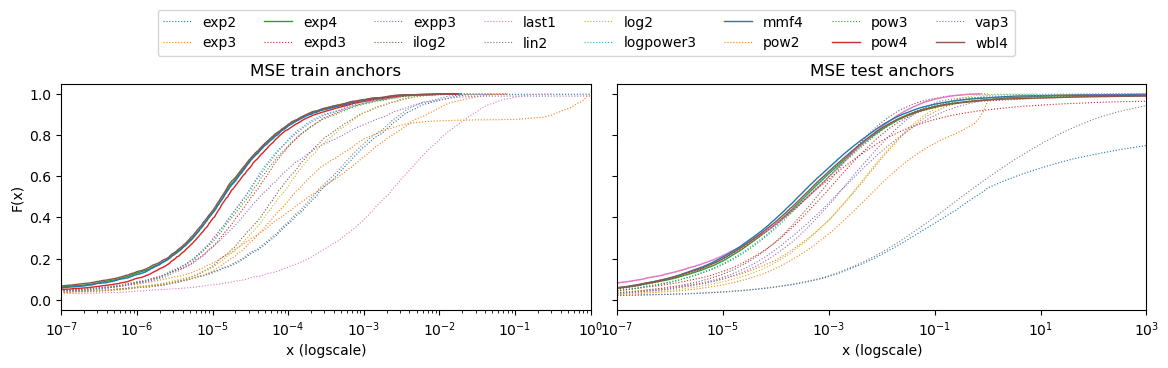

In [101]:
fig, (ax1, ax2) = plt.subplots(1, 2, dpi=100, sharey=True, figsize=(14,3))

lw_default = 0.8
ls_default = ":"

i = 0

winners_fit = ["pow4", "mmf4", "exp4", "wbl4"]
winners_extrapolate = ["mmf4", "exp4", "wbl4", "last1"]

for [curve_model, df_curve_model] in df_for_cdf_plot_filtered.groupby('curve_model'):
    
    #plot_metric(df_curve_model['MSE_tst'],curve_model,ls=ls)
    
    lw = 1 if curve_model in winners_fit else lw_default
    ls = "-" if curve_model in winners_fit else ls_default
    
    empirical_cdf(ax1,df_curve_model['MSE_trn'],curve_model,ls=ls,label=curve_model, linewidth=lw)
    i += 1
    ax1.set_xlabel('x (logscale)')
    ax1.set_xscale('log')
    ax1.set_xlim([1e-7,1])
    ax1.set_ylabel('F(x)')
    ax1.set_title('MSE train anchors')

    
i = 0
for [curve_model, df_curve_model] in df_total.groupby('curve_model'):
    
    #if i > 5:
     #   break
    lw = 1 if curve_model in winners_extrapolate else lw_default
    ls = "-" if curve_model in winners_extrapolate else ls_default
    
    #plot_metric(df_curve_model['MSE_tst'],curve_model,ls=ls)
    empirical_cdf(ax2,df_curve_model['MSE_tst_last'],curve_model,ls=ls,label=curve_model, linewidth=lw)
    i += 1
    
    ax2.set_xlabel('x (logscale)')
    ax2.set_title('MSE test anchors')
    ax2.set_xscale('log')
    ax2.set_xlim([1e-7,1e3])


handles, labels = ax1.get_legend_handles_labels()
lgd = fig.legend(handles, labels, loc='upper center', bbox_to_anchor=(0.5, 1.15), ncol=8)

plt.subplots_adjust(wspace=0.05)

#plt.legend(ncol=3, bbox_to_anchor=(1.05, 1), loc='upper left')



#ax.legend()
#ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))



fig.savefig('cdf_per_learner_trn_tst_beauty.png',bbox_inches='tight')
fig.savefig('cdf_per_learner_trn_tst_beauty.eps',bbox_inches='tight')

plt.show()

/home/felix/anaconda3/lib/python3.7/site-packages/numpy/ma/core.py:6849: RuntimeWarning: overflow encountered in power
  result = np.where(m, fa, umath.power(fa, fb)).view(basetype)
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


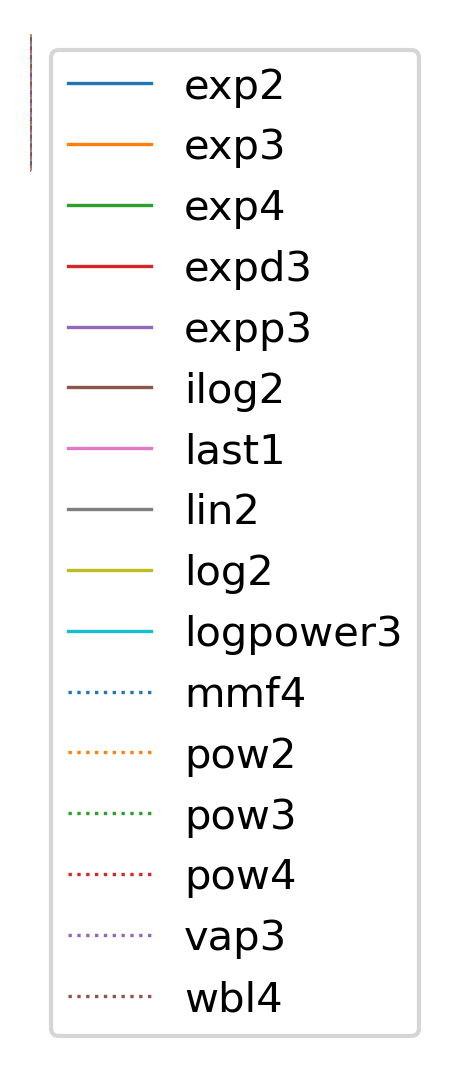

In [102]:
fig, (ax1, ax2) = plt.subplots(1, 2, dpi=300, sharey=True)
#lt.figure(dpi=300)
#s = fig.add_gridspec(2, 2, hspace=0, wspace=0)
#ax1, ax2) = gs.subplots(sharey='row')

lw = 0.8

i = 0
for [curve_model, df_curve_model] in df_total.groupby('curve_model'):
    ls = '-'
    if i > 9:
        ls = ':'
    #plot_metric(df_curve_model['MSE_tst'],curve_model,ls=ls)
    empirical_cdf(ax1,df_curve_model['MSE_trn'],curve_model,ls=ls,label=curve_model, linewidth=lw)
    i += 1

    plt.sca(ax1) 
    plt.xlabel('x (logscale)')
    plt.xscale('log')
    plt.xlim([1e-7,1e3])
    plt.ylabel('F(x)')
    #plt.title('MSE train anchors')
    plt.axis('off')


    
i = 0
for [curve_model, df_curve_model] in df_total.groupby('curve_model'):
    ls = '-'
    if i > 9:
        ls = ':'
    #plot_metric(df_curve_model['MSE_tst'],curve_model,ls=ls)
    empirical_cdf(ax2,df_curve_model['MSE_tst_last'],curve_model,ls=ls,label=curve_model, linewidth=lw)
    i += 1
    
    plt.sca(ax2) 
    plt.xlabel('x (logscale)')
    #plt.title('MSE test anchors')
    plt.axis('off')

    #plt.ylabel('F(x)')

box = ax.get_position()
ax1.set_position([box.x0, box.y0, box.x0*0.01, box.y0])
ax2.set_position([box.x0, box.y0, box.y0*0.01, box.y0])

plt.legend()

plt.xscale('log')
plt.xlim([1e-7,1e3])

ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.savefig('cdf_per_learner_trn_tst_legend.png',bbox_inches='tight')
plt.savefig('cdf_per_learner_trn_tst_legend.eps',bbox_inches='tight')

plt.show()

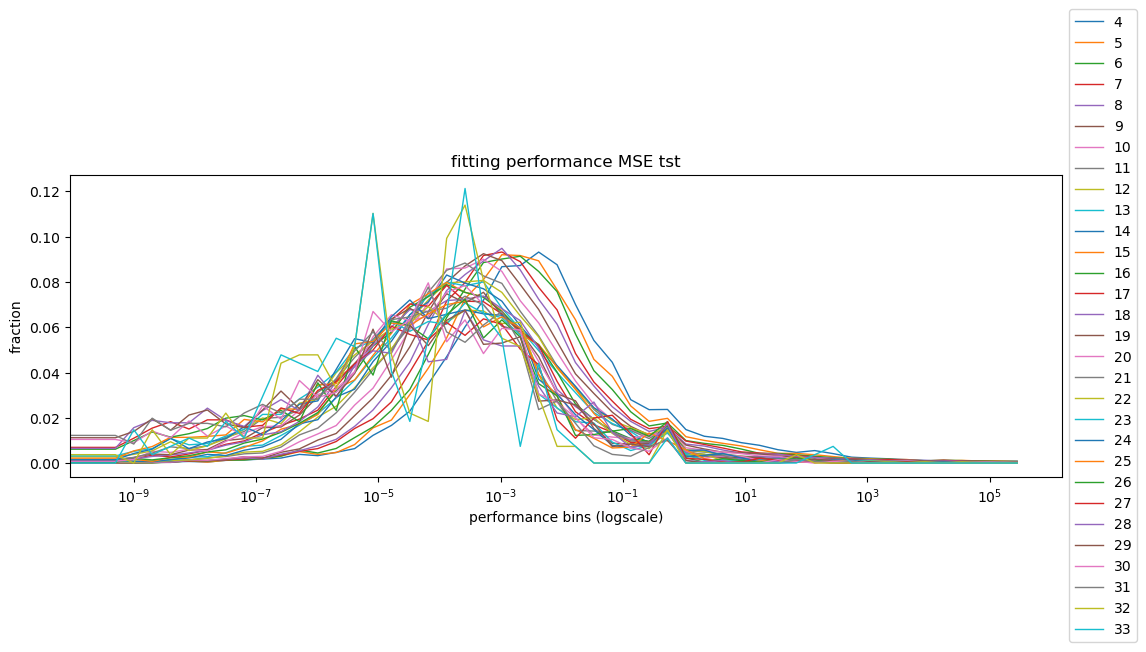

In [13]:
plt.figure(figsize=(16,4),dpi=100)
ax = plt.subplot(111)

i = 0
for [n, df_n] in df_total.groupby('n'):
    ls = '-'
    plot_metric(df_n['MSE_tst'],str(n),ls=ls)
    i += 1

box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
    
plt.xlabel('performance bins (logscale)')
plt.ylabel('fraction')
plt.legend()
plt.title('fitting performance MSE tst')

ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.show()

In [14]:
df_clean['n'].unique()

NameError: name 'df_clean' is not defined